In [377]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sys
import random
import sklearn

from scipy.stats import uniform
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler


**PROJECT SCOPING**

1. Goals
    1. Create machine to predict poker hand class
2. Actions
    1. Try different models
    2. Train model
    3. Improve accuracy
3. Data
    1. Read data
    2. Prepare data(try prunning rank of cards to 1-5,6-9, 10-13)
    3. Choose X and y
4. Anaysis
    1. It involve prediction

**READING DATA FROM FILE**

In [250]:
df = pd.read_csv("/Users/mikolaj/Documents/GitHub/ML-project-jupiter-notebook/poker-hand-testing.data.CSV", nrows = 5000)

In [251]:
columns_names = ['S1', 'C1', 'S2', 'C2', 'S3', 'C3', 'S4', 'C4', 'S5', 'C5', 'CLASS']
df.columns = columns_names
print(df)

      S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0      2   5   1   7   4   9   4   8   3   9      1
1      3   1   3   9   4   1   4   7   3  11      1
2      2   3   2   2   4   2   3   5   4  12      1
3      3   1   2   4   3   7   4  12   4  10      0
4      1  11   2  12   4   9   1   9   4   7      1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
4995   2   8   2   1   1   1   2   7   4  13      1
4996   2  12   1   9   2  11   3   1   3   3      0
4997   2   4   1   3   2   5   1   5   3   9      1
4998   1  13   3  12   2  10   1   7   1   4      0
4999   4  13   1   2   4  11   1   7   4   2      1

[5000 rows x 11 columns]


**PREVIEW THE DATA**

In [350]:
print(df.head())
print(df.info())

   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0   2   1   1   2   4   2   4   2   3   2      1
1   3   1   3   2   4   1   4   2   3   3      1
2   2   1   2   1   4   1   3   1   4   3      1
3   3   1   2   1   3   2   4   3   4   3      0
4   1   3   2   3   4   2   1   2   4   2      1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   S1      5000 non-null   int64
 1   C1      5000 non-null   int64
 2   S2      5000 non-null   int64
 3   C2      5000 non-null   int64
 4   S3      5000 non-null   int64
 5   C3      5000 non-null   int64
 6   S4      5000 non-null   int64
 7   C4      5000 non-null   int64
 8   S5      5000 non-null   int64
 9   C5      5000 non-null   int64
 10  CLASS   5000 non-null   int64
dtypes: int64(11)
memory usage: 429.8 KB
None


**CREATING CORRELATION HEAT MAP**

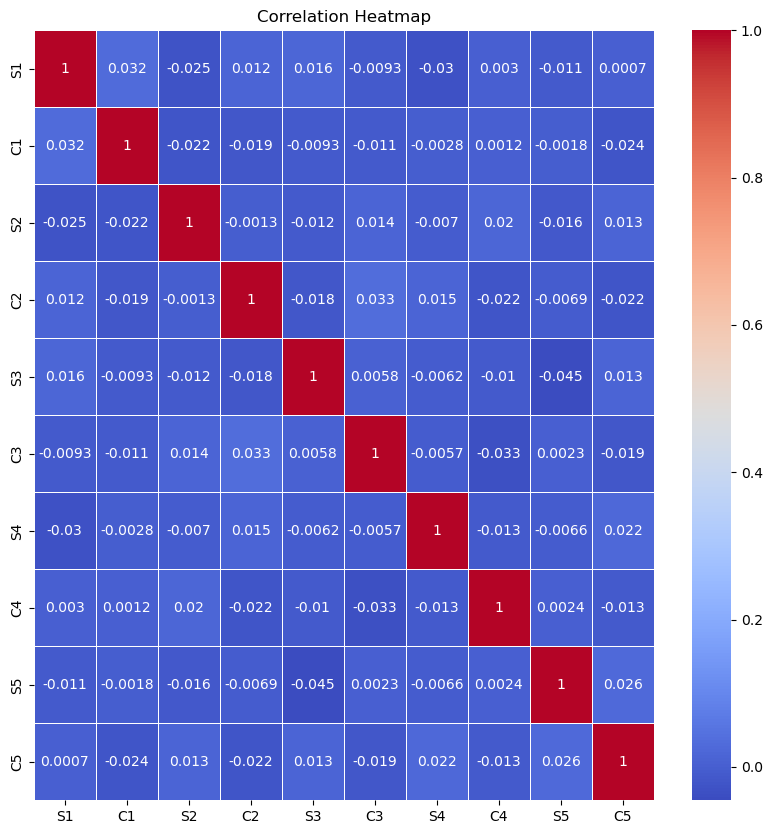

In [352]:
features_df = df.drop(columns = "CLASS")
correlation_matrix = features_df.corr().round(4)
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Correlation Heatmap')
plt.show()


**FEATURE ENGINEERING**

In [254]:
rank_mapping = {
    1: 1, 2: 1, 3: 1, 4: 1, 5: 1,  # Old rangs (1-5) map to 1
    6: 2, 7: 2, 8: 2, 9: 2,        # Old rangs (6-9) map to 2
    10: 3, 11: 3, 12: 3, 13: 3     # Old rangs (10-13) map to 3
}
for column in ['C1', 'C2', 'C3', 'C4', 'C5']:
    df[column] = df[column].replace(rank_mapping)
print(df)

target_column = 'CLASS'
feature_columns = [col for col in columns_names if col != target_column]

X = pd.get_dummies(df[feature_columns], drop_first=True)
y = df[target_column]

ran_state = 1
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = ran_state)

      S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  CLASS
0      2   1   1   2   4   2   4   2   3   2      1
1      3   1   3   2   4   1   4   2   3   3      1
2      2   1   2   1   4   1   3   1   4   3      1
3      3   1   2   1   3   2   4   3   4   3      0
4      1   3   2   3   4   2   1   2   4   2      1
...   ..  ..  ..  ..  ..  ..  ..  ..  ..  ..    ...
4995   2   2   2   1   1   1   2   2   4   3      1
4996   2   3   1   2   2   3   3   1   3   1      0
4997   2   1   1   1   2   1   1   1   3   2      1
4998   1   3   3   3   2   3   1   2   1   1      0
4999   4   3   1   1   4   3   1   2   4   1      1

[5000 rows x 11 columns]


**TEST DIFFERENT ML MODELS**
1. Logistic Regression
2. Decision Tree
3. Random Forest
4. Support Vector Machine
5. K Nearest Neighbour
6. Naive Bayes
7. Gradient Boosting
8. Stacking Classifier

**Logistic Regression**


In [327]:
#Logistic Regression without Hyperparameter Tuning implementation
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 5000, random_state = ran_state)
%time lr.fit(x_train, y_train)
print(f"Logistic Regression without Hyperparameter Tuning = {lr.score(x_test, y_test)}")
# Logistic Regression score without Hyperparameter Tuning = 0.494

CPU times: user 3.77 s, sys: 289 ms, total: 4.06 s
Wall time: 2.23 s
Logistic Regression without Hyperparameter Tuning = 0.494


In [259]:
#Logistic Regression with Hyperparameter Tuning implementation
lr = LogisticRegression(max_iter = 5000,random_state = ran_state)

#RandomizedSearchCV with Logistic Regression
param_randomized = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0, scale=100)
}
lr_randomized = RandomizedSearchCV(lr, param_randomized, random_state = ran_state, n_iter = 8)
lr_randomized.fit(x_train, y_train)

lr_randomized_table = pd.concat([pd.DataFrame(lr_randomized.cv_results_['params']), pd.DataFrame(lr_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(lr_randomized_table)
print(lr_randomized.best_params_)
print(lr_randomized.best_score_)
# lr_randomized best estimator is: 'penalty' = 'l2' and 'C' = 93.255736 

#GridSearchCV with Logistic Regression
param_grid = {'penalty' : ['l2'], 'C' : [90, 91, 92, 93, 94, 95, 96]}
lr_gridsearch = GridSearchCV(lr,param_grid)
lr_gridsearch.fit(x_train, y_train)

lr_gridsearch_table = pd.concat([pd.DataFrame(lr_gridsearch.cv_results_['params']), pd.DataFrame(lr_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(lr_gridsearch_table)
# lr_gridsearch best estimator is: 'penalty' = 'l2' and 'C' = 93 


/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
15 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/base.py", lin

           C penalty  Accuracy
0  41.702200      l1       NaN
1  93.255736      l2   0.49375
2  30.233257      l2   0.49350
3  23.608898      l2   0.49375
4  18.626021      l2   0.49350
5  66.974604      l2   0.49350
6  53.881673      l1       NaN
7  31.327352      l1       NaN


In [326]:
#Logistic Regression with best parameters score:
lr_best = LogisticRegression(penalty = 'l2', C = 93, random_state = ran_state, max_iter = 5000)
%time lr_best.fit(x_train, y_train)
print(f"Logistic Regression with Hyperparameter Tuning = {lr_best.score(x_test, y_test)}")
# Logistic Regression score with Hyperparameter Tuning = 0.494

CPU times: user 6.87 s, sys: 496 ms, total: 7.37 s
Wall time: 3.77 s
Logistic Regression with Hyperparameter Tuning = 0.494


**Decision Tree**

In [381]:
#Decision Tree without Hyperparmeter Tuning implementation
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state = ran_state)
%time tree.fit(x_train, y_train)
print(f"Decision Tree score without Hyperparameter Tuning = {tree.score(x_test, y_test)}")
# Decision Tree score without Hyperparameter Tuning = 0.437

CPU times: user 17.4 ms, sys: 2.43 ms, total: 19.8 ms
Wall time: 19.1 ms
Decision Tree score without Hyperparameter Tuning = 0.437


In [211]:
#Decision Tree with Hyperparameter Tuning impementation
tree = DecisionTreeClassifier(random_state = ran_state)

#RandomizedSearchCV with Decision Tree
param_randomized = {
    'max_depth': [None] + list(np.arange(1, 100)), 
    'min_samples_split': list(np.arange(1, 100))  
}
tree_randomized = RandomizedSearchCV(tree, param_randomized, random_state = ran_state, n_iter = 1000)
tree_randomized.fit(x_train, y_train)

tree_randomized_table = pd.concat([pd.DataFrame(tree_randomized.cv_results_['params']), pd.DataFrame(tree_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(tree_randomized_table)
print(tree_randomized.best_params_)
print(tree_randomized.best_score_)
# tree_randomized best estimator is: 'min_samples_split' = 11 and 'max_depth' = 3

#GridSearchCV with Decision Tree
param_grid = {'min_samples_split' : [9,10,11,12,13,14,15], 'max_depth' : [1,2,3,4,5,6,7]}
tree_gridsearch = GridSearchCV(tree,param_grid)
tree_gridsearch.fit(x_train, y_train)

tree_gridsearch_table = pd.concat([pd.DataFrame(tree_gridsearch.cv_results_['params']), pd.DataFrame(tree_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(tree_gridsearch_table)
# tree_gridsearch best estimator is: 'min_samples_split' = 11 and 'max_depth' = 3 

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 5000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/base.py", l

{'min_samples_split': 11, 'max_depth': 3}
0.509
    max_depth  min_samples_split  Accuracy
0           1                  9   0.50275
1           1                 10   0.50275
2           1                 11   0.50275
3           1                 12   0.50275
4           1                 13   0.50275
5           1                 14   0.50275
6           1                 15   0.50275
7           2                  9   0.49850
8           2                 10   0.49850
9           2                 11   0.49850
10          2                 12   0.49850
11          2                 13   0.49850
12          2                 14   0.49850
13          2                 15   0.49850
14          3                  9   0.50900
15          3                 10   0.50900
16          3                 11   0.50900
17          3                 12   0.50900
18          3                 13   0.50900
19          3                 14   0.50900
20          3                 15   0.50900
21    

In [324]:
#Decision Tree with best parameters score:
tree_best = DecisionTreeClassifier( max_depth = 3, min_samples_split = 11, random_state = ran_state)
%time tree_best.fit(x_train, y_train)
print(f"Decision Tree with Hyperparameter Tuning = {tree_best.score(x_test, y_test)}")
#Decision Tree score with Hyperparameter Tuning = 0.472

CPU times: user 7.51 ms, sys: 1.82 ms, total: 9.32 ms
Wall time: 89.6 ms
Decision Tree with Hyperparameter Tuning = 0.472


**Random Forest**

In [323]:
#Random Forest without Hyperparmeter Tuning implementation
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state = ran_state)
%time rf.fit(x_train, y_train)
print(f"Random Forest score without Hyperparameter Tuning = {rf.score(x_test, y_test)}")
# Random Forest score without Hyperparameter Tuning = 0.496

CPU times: user 672 ms, sys: 40.1 ms, total: 712 ms
Wall time: 804 ms
Random Forest score without Hyperparameter Tuning = 0.496


In [262]:
#Random Forest with Hyperparameter Tuning impementation
rf = RandomForestClassifier(random_state = ran_state)

#RandomizedSearchCV with Random Forest
param_randomized = {
    'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
    'max_features': ['log2', 'sqrt', None],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_randomized = RandomizedSearchCV(rf, param_randomized, random_state = ran_state, n_iter = 50, cv = 3, verbose = 2, n_jobs = -1)
rf_randomized.fit(x_train, y_train)

rf_randomized_table = pd.concat([pd.DataFrame(rf_randomized.cv_results_['params']), pd.DataFrame(rf_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(rf_randomized_table)
print(rf_randomized.best_params_)
print(rf_randomized.best_score_)
# rf_randomized best estimator is: 'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True

#GridSearchCV with Decision Tree
param_grid = {
    'n_estimators' : [1000,1100,1200,1300,1400],
    'min_samples_split' : [3,4,5,6,7],
    'min_samples_leaf': [1,2,3,4],
    'max_features': ['log2'],
    'max_depth': [30,40,50,60,70],
    'bootstrap': [True]}
rf_gridsearch = GridSearchCV(rf,param_grid)
rf_gridsearch.fit(x_train, y_train)

rf_gridsearch_table = pd.concat([pd.DataFrame(rf_gridsearch.cv_results_['params']), pd.DataFrame(rf_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(rf_gridsearch_table)
print(rf_gridsearc.best_params_)
print(rf_gridsearch.best_score_)
# rf_gridsearch best estimator is: 'n_estimators': 1200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 50, 'bootstrap': True

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


{'n_estimators': 1200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': None, 'max_depth': 10, 'bootstrap': True}
0.524


In [382]:
#Random Forest with best parameters score:
rf_best = RandomForestClassifier(n_estimators = 1200, min_samples_leaf = 2, max_features = None, bootstrap = True, max_depth = 10, min_samples_split = 10, random_state = ran_state)
%time rf_best.fit(x_train, y_train)
print(f"Random Forest with Hyperparameter Tuning = {rf_best.score(x_test, y_test)}")
#Random Forest score with Hyperparameter Tuning = 0.49

CPU times: user 7.64 s, sys: 123 ms, total: 7.76 s
Wall time: 7.87 s
Random Forest with Hyperparameter Tuning = 0.49


**Support Vector Machine**

In [321]:
#Support Vector Machine without Hyperparmeter Tuning implementation
from sklearn.svm import SVC
svc = SVC(random_state = ran_state)
%time svc.fit(x_train, y_train)
print(f"Support Vector Machine score without Hyperparameter Tuning = {svc.score(x_test, y_test)}")
# Support Vector Machine score without Hyperparameter Tuning = 0.518

CPU times: user 1.23 s, sys: 27.2 ms, total: 1.26 s
Wall time: 1.35 s
Support Vector Machine score without Hyperparameter Tuning = 0.518


In [270]:
#Support Vector Machine with Hyperparameter Tuning impementation
svc = SVC(random_state = ran_state)

#RandomizedSearchCV with Support Vector Machine
param_randomized = {
    'C': np.linspace(0.01, 1, 10),
    'gamma': np.linspace(0.01, 1, 10)
}
svc_randomized = RandomizedSearchCV(svc, param_randomized, random_state = ran_state, n_iter = 8)
svc_randomized.fit(x_train, y_train)

svc_randomized_table = pd.concat([pd.DataFrame(svc_randomized.cv_results_['params']), pd.DataFrame(svc_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(svc_randomized_table)
print(svc_randomized.best_params_)
print(svc_randomized.best_score_)
# svc_randomized best estimator is: 'C' = 0.89, 'gamma' = 0.12

# #GridSearchCV with Support Vector Machine
param_grid = {
    'C': [0.7, 0.8, 0.9, 1, 1.1],
    'gamma': [0.08, 0.1, 0.12, 0.14, 0.16]
}
svc_gridsearch = GridSearchCV(svc,param_grid)
svc_gridsearch.fit(x_train, y_train)

svc_gridsearch_table = pd.concat([pd.DataFrame(svc_gridsearch.cv_results_['params']), pd.DataFrame(svc_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(svc_gridsearch_table)
print(svc_gridsearch.best_params_)
print(svc_gridsearch.best_score_)
# # svc_gridsearch best estimator is: 'C' = 0.9, 'gamma' = 0.1

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


      C  gamma  Accuracy
0   0.7   0.08   0.52650
1   0.7   0.10   0.52800
2   0.7   0.12   0.53225
3   0.7   0.14   0.52925
4   0.7   0.16   0.52675
5   0.8   0.08   0.52575
6   0.8   0.10   0.53025
7   0.8   0.12   0.52800
8   0.8   0.14   0.52800
9   0.8   0.16   0.52675
10  0.9   0.08   0.52775
11  0.9   0.10   0.53250
12  0.9   0.12   0.53000
13  0.9   0.14   0.52800
14  0.9   0.16   0.52700
15  1.0   0.08   0.53075
16  1.0   0.10   0.53075
17  1.0   0.12   0.53200
18  1.0   0.14   0.52825
19  1.0   0.16   0.52600
20  1.1   0.08   0.53050
21  1.1   0.10   0.53150
22  1.1   0.12   0.53075
23  1.1   0.14   0.52725
24  1.1   0.16   0.52550
{'C': 0.9, 'gamma': 0.1}
0.5325


In [320]:
#Support Vector Machine with best parameters score:
svc_best = SVC(gamma = 0.1, C = 0.9, random_state = ran_state)
%time svc_best.fit(x_train, y_train)
print(f"Support Vector Machine with Hyperparameter Tuning = {svc_best.score(x_test, y_test)}")
#Support vector Machine score with Hyperparameter Tuning = 0.518

CPU times: user 1.14 s, sys: 38.7 ms, total: 1.17 s
Wall time: 1.21 s
Support Vector Machine with Hyperparameter Tuning = 0.518


**K Nearest Neighbour**

In [319]:
#K Nearest Neighbour without Hyperparmeter Tuning implementation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knn = KNeighborsClassifier()
%time knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"K Nearest Neighbour score without Hyperparameter Tuning = {accuracy}")
#K Nearest Neighbour score without Hyperparameter Tuning = 0.469

CPU times: user 6.66 ms, sys: 400 µs, total: 7.06 ms
Wall time: 8.94 ms
K Nearest Neighbour score without Hyperparameter Tuning = 0.469


In [292]:
#K Nearest Neighbour with Hyperparameter Tuning impementation
knn = KNeighborsClassifier()

#RandomizedSearchCV with K Nearest Neighbour
param_randomized = {'n_neighbors': np.floor(np.linspace(5, 250, 10)).astype(int),
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1, 2]}

knn_randomized = RandomizedSearchCV(knn, param_randomized, random_state = ran_state, n_iter = 20, error_score = 'raise')
knn_randomized.fit(x_train, y_train)

knn_randomized_table = pd.concat([pd.DataFrame(knn_randomized.cv_results_['params']), pd.DataFrame(knn_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(knn_randomized_table)
print(knn_randomized.best_params_)
print(knn_randomized.best_score_)
# knn_randomized best estimator is: 'weights' = 'distance', 'p' = 1, 'n_neighbors' = 113, 'algorithm' = 'kd_tree'

#GridSearchCV with K Nearest Neighbour
param_grid = {
    'n_neighbors': np.arange(90, 130),
    'weights': ['distance'],
    'p': [1],
    'algorithm': ['kd_tree']
}
knn_gridsearch = GridSearchCV(knn,param_grid)
knn_gridsearch.fit(x_train, y_train)

knn_gridsearch_table = pd.concat([pd.DataFrame(knn_gridsearch.cv_results_['params']), pd.DataFrame(knn_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(knn_gridsearch_table)
print(knn_gridsearch.best_params_)
print(knn_gridsearch.best_score_)
# knn_gridsearch best estimator is: 'algorithm' = 'kd_tree', 'n_neighbors' = 120, 'p' = 1, 'weights' = 'distance'

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


   algorithm  n_neighbors  p   weights  Accuracy
0    kd_tree           90  1  distance   0.51975
1    kd_tree           91  1  distance   0.52000
2    kd_tree           92  1  distance   0.51825
3    kd_tree           93  1  distance   0.51950
4    kd_tree           94  1  distance   0.52175
5    kd_tree           95  1  distance   0.52150
6    kd_tree           96  1  distance   0.52175
7    kd_tree           97  1  distance   0.52025
8    kd_tree           98  1  distance   0.51925
9    kd_tree           99  1  distance   0.52400
10   kd_tree          100  1  distance   0.51800
11   kd_tree          101  1  distance   0.52150
12   kd_tree          102  1  distance   0.52075
13   kd_tree          103  1  distance   0.52200
14   kd_tree          104  1  distance   0.52150
15   kd_tree          105  1  distance   0.51775
16   kd_tree          106  1  distance   0.52100
17   kd_tree          107  1  distance   0.51575
18   kd_tree          108  1  distance   0.51950
19   kd_tree        

In [317]:
#K Nearest Neighbour with best parameters score:
knn_best = KNeighborsClassifier(algorithm = 'kd_tree', n_neighbors = 120, p = 1, weights = 'distance')
%time knn_best.fit(x_train, y_train)
print(f"K Nearest Neighbour with Hyperparameter Tuning = {knn_best.score(x_test, y_test)}")
#K Nearest Neighbour score with Hyperparameter Tuning = 0.511

CPU times: user 8.38 ms, sys: 5.99 ms, total: 14.4 ms
Wall time: 31.6 ms
K Nearest Neighbour with Hyperparameter Tuning = 0.511


**Naive Bayes**

In [316]:
#Naive Bayes without Hyperparmeter Tuning implementation
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
%time nb.fit(x_train, y_train)
print(f"Naive Bayes score without Hyperparameter Tuning = {nb.score(x_test, y_test)}")
#Naive Bayes score without Hyperparameter Tuning = 0.495

CPU times: user 6.41 ms, sys: 2.37 ms, total: 8.78 ms
Wall time: 7.75 ms
Naive Bayes score without Hyperparameter Tuning = 0.495


In [318]:
#Naive Bayes  with Hyperparameter Tuning impementation
nb = MultinomialNB()

#GridSearchCV with Naive Bayes
param_grid = {
    'alpha': np.linspace(0.01, 1, 100)
}
nb_gridsearch = GridSearchCV(nb,param_grid, cv=5, scoring='accuracy')
nb_gridsearch.fit(x_train, y_train)

nb_gridsearch_table = pd.concat([pd.DataFrame(nb_gridsearch.cv_results_['params']), pd.DataFrame(nb_gridsearch.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(nb_gridsearch_table)
print(nb_gridsearch.best_params_)
print(nb_gridsearch.best_score_)
# nb_gridsearch best estimator is: 'alpha' = 1

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


    alpha  Accuracy
0    0.01   0.50275
1    0.02   0.50275
2    0.03   0.50275
3    0.04   0.50275
4    0.05   0.50275
..    ...       ...
95   0.96   0.50275
96   0.97   0.50275
97   0.98   0.50275
98   0.99   0.50275
99   1.00   0.50275

[100 rows x 2 columns]
{'alpha': 0.01}
0.50275


In [313]:
#Naive Bayes with best parameters score:
nb_best = MultinomialNB(alpha = 1)
%time nb_best.fit(x_train, y_train)
print(f"Naive Bayes with Hyperparameter Tuning = {nb_best.score(x_test, y_test)}")
#Naive Bayes score with Hyperparameter Tuning = 0.495

CPU times: user 5.82 ms, sys: 222 µs, total: 6.04 ms
Wall time: 7.17 ms
Naive Bayes with Hyperparameter Tuning = 0.495


**Gradient Boosting**

In [310]:
#Gradient Boosting without Hyperparmeter Tuning implementation
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(random_state = ran_state)
%time gbc.fit(x_train, y_train)
print(f"Gradient Boosting score without Hyperparameter Tuning = {gbc.score(x_test, y_test)}")
#Gradient Boosting score without Hyperparameter Tuning = 0.512

CPU times: user 4.04 s, sys: 30.5 ms, total: 4.07 s
Wall time: 4.1 s
Gradient Boosting score without Hyperparameter Tuning = 0.512


In [337]:
#Gradient Boosting  with Hyperparameter Tuning impementation
gbc = GradientBoostingClassifier(random_state = ran_state)

#GridSearchCV with Gradient Boosting
param_grid = {
    'min_samples_split': [ 30, 50],
    'min_samples_leaf': [ 30, 50],
    'max_depth': [3,5],
    'max_features': [3,5],
    'n_estimators': [10, 500, 1000]
}
%time gbc_randomized = RandomizedSearchCV(gbc,param_grid, random_state = ran_state, n_iter = 10)
%time gbc_randomized.fit(x_train, y_train)

gbc_randomized_table = pd.concat([pd.DataFrame(gbc_randomized.cv_results_['params']), pd.DataFrame(gbc_randomized.cv_results_['mean_test_score'], columns=['Accuracy'])], axis=1)
print(gbc_randomized_table)
print(gbc_randomized.best_params_)
print(gbc_randomized.best_score_)
# gbc_gridsearch best estimator is: 'alpha' = 1

CPU times: user 971 µs, sys: 1e+03 ns, total: 972 µs
Wall time: 984 µs


/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 13min 53s, sys: 7.15 s, total: 14min 1s
Wall time: 14min 34s
   n_estimators  min_samples_split  min_samples_leaf  max_features  max_depth  \
0            10                 50                50             3          5   
1          1000                 50                50             5          3   
2          1000                 30                30             5          5   
3            10                 30                30             5          5   
4          1000                 30                30             3          3   
5            10                 50                30             3          3   
6           500                 30                50             3          5   
7          1000                 30                30             3          5   
8          1000                 30                50             5          5   
9            10                 50                30             3          5   

   Accuracy  
0   0.51625  
1  

In [338]:
#Gradient Boosting with best parameters score:
gbc_best = GradientBoostingClassifier(n_estimators = 1000, min_samples_split = 30, min_samples_leaf = 30, max_features = 3, max_depth = 3)
%time gbc_best.fit(x_train, y_train)
print(f"Gradient Boosting with Hyperparameter Tuning = {gbc_best.score(x_test, y_test)}")
#Gradient Boosting score with Hyperparameter Tuning = 0.526

CPU times: user 27.2 s, sys: 181 ms, total: 27.4 s
Wall time: 27.9 s
Gradient Boosting with Hyperparameter Tuning = 0.526


**Stacking Classifier**

In [348]:
#Stacking Classifier implementation
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import StratifiedKFold
level_0_estimators = dict()
level_0_estimators["tree"] = DecisionTreeClassifier( max_depth = 3, min_samples_split = 11, random_state = ran_state)
level_0_estimators["logreg"] = LogisticRegression(penalty = 'l2', C = 93, random_state = ran_state, max_iter = 5000)
level_0_estimators["forest"] = RandomForestClassifier(n_estimators = 1200, min_samples_leaf = 2, max_features = None, bootstrap = True, max_depth = 10, min_samples_split = 10, random_state = ran_state)

level_0_columns = [f"{name}_prediction" for name in level_0_estimators.keys()]

level_1_estimator = RandomForestClassifier(n_estimators = 1200, min_samples_leaf = 2, max_features = None, bootstrap = True, max_depth = 10, min_samples_split = 10, random_state = ran_state)


kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=ran_state)
stacking_clf = StackingClassifier(estimators=list(level_0_estimators.items()), 
                                    final_estimator=level_1_estimator, 
                                    passthrough=True, cv=kfold, stack_method="predict_proba")
%time stacking_clf.fit(x_train, y_train)
print(f"Stacking Classifier = {stacking_clf.score(x_test, y_test)}")
#Stacking Classifier score = 0.511

/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
/Users/mikolaj/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_split.py:725: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


CPU times: user 3min 7s, sys: 3.71 s, total: 3min 10s
Wall time: 2min 51s
Stacking Classifier with Hyperparameter Tuning = 0.511


**Findings**

In [398]:
algorithms = ['Logistic Regression', 'Logistic Regression tuned', 'Decision Tree', 'Decision Tree tuned', 'Random Forest', 'Random Forest tuned',
              'Support Vector Machine', 'Support Vector Machine tuned', 'K Nearest Neighbour', 'K Nearest Neighbour tuned',
             'Naive Bayes', 'Naive Bayes tuned', 'Gradient Boosting', 'Gradient Boosting tuned', 'Stacking Classifier']
results = [0.494, 0.494, 0.437, 0.472, 0.496, 0.49, 0.518, 0.518, 0.469, 0.511, 0.495, 0.495, 0.512, 0.526, 0.511]
execution_times = [2.23, 3.77, 0.0226, 0.0896, 0.804, 7.73, 1.35, 1.21, 0.00894, 0.0316, 0.00775, 0.00717, 4.1, 27.9, 171]


data = {'Algorithm': algorithms, 'Result': results, 'Execution Time (s)': execution_times}
df = pd.DataFrame(data)

# Apply styling to the DataFrame for better readability
styled_df = (
    df.style
    .format({'Result': '{:.2f}'})
    .set_properties(**{'text-align': 'center'})
    .hide(axis = "index")
    .set_table_styles([{'selector': 'th', 'props': [('text-align', 'center')]}])
)
# Display the styled DataFrame
styled_df

Algorithm,Result,Execution Time (s)
Logistic Regression,0.49,2.230000
Logistic Regression tuned,0.49,3.770000
Decision Tree,0.44,0.022600
Decision Tree tuned,0.47,0.089600
Random Forest,0.50,0.804000
Random Forest tuned,0.49,7.730000
Support Vector Machine,0.52,1.350000
Support Vector Machine tuned,0.52,1.210000
K Nearest Neighbour,0.47,0.008940
K Nearest Neighbour tuned,0.51,0.031600


**Conclusion**

1. I was able to train a model capable of predicting a possible hand in poker knowing all five cards in the middle of the table, and not knowing the two cards of the person playing, with an accuracy of more than fifty percent. 

2. Tuned Gradient Boosting worked best, however, due to the long processing time, it is more cost-effective to choose Tuned Support Vector Machine. 

3. The percentage results would have been higher if more data had been used, but unfortunately, due to the limitations of my computer, I only used five thousand out of a million possible examples. 


**Next Steps**

1. In the future, this model could be used, for example, for televised broadcasts of poker games, so that each player's chances of winning are displayed on the monitor. 

2. There is still room for improvement of the model, with the use of more data the results could be greatly improved. 
